In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import csv
from pathlib import Path
import numpy as np


In [2]:
# Reading data from preprocessed csv file

filename = 'Tweets_sorted_on_negative_compundscores.csv'

pathcsv = Path(filename).resolve()
data = pd.read_csv(str(pathcsv))
data.head()

,Id,Language,User Id,Retweet Status,Mentions,Hashtags,Text,Filtered Text,Sentiment,Polarity,Subjectivity,Sentiment Analyser,Compound Score
0,1.250000e+18,en,1.200000e+18,{'created_at': 'Tue Mar 31 23:36:14 +0000 2020...,AriTheDon,NaN,RT @AriTheDon: Go find somebody to love y’all ...,go find somebodi love sorri ass miser ass lone...,"Sentiment(polarity=-0.35000000000000003, subje...",-0.35,0.8625,"{'neg': 0.773, 'neu': 0.134, 'pos': 0.094, 'co...",-0.9808
1,1.250000e+18,en,1.843519e+07,{'created_at': 'Tue Mar 31 23:36:14 +0000 2020...,AriTheDon,NaN,RT @AriTheDon: Go find somebody to love y’all ...,go find somebodi love sorri ass miser ass lone...,"Sentiment(polarity=-0.35000000000000003, subje...",-0.35,0.8625,"{'neg': 0.773, 'neu': 0.134, 'pos': 0.094, 'co...",-0.9808
2,1.250000e+18,en,4.398555e+09,{'created_at': 'Tue Mar 31 23:36:14 +0000 2020...,AriTheDon,NaN,RT @AriTheDon: Go find somebody to love y’all ...,go find somebodi love sorri ass miser ass lone...,"Sentiment(polarity=-0.35000000000000003, subje...",-0.35,0.8625,"{'neg': 0.773, 'neu': 0.134, 'pos': 0.094, 'co...",-0.9808
3,1.250000e+18,en,1.020000e+18,{'created_at': 'Wed Apr 01 01:48:41 +0000 2020...,BrianRebellion,NaN,RT @BrianRebellion: Star Wars: The Phantom Men...,star war phantom menac star war attack clone s...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.00,0.0000,"{'neg': 0.707, 'neu': 0.293, 'pos': 0.0, 'comp...",-0.9753
4,1.250000e+18,en,7.721473e+08,{'created_at': 'Wed Apr 01 06:42:10 +0000 2020...,notagaindrryn,NaN,RT @notagaindrryn: Bitch fuck you and everythi...,bitch fuck everyth stand whore fuck talk nobod...,"Sentiment(polarity=-0.4, subjectivity=0.6)",-0.40,0.6000,"{'neg': 0.78, 'neu': 0.22, 'pos': 0.0, 'compou...",-0.9694


In [3]:
# Obtaining 3 numerical features from each tweet for performing clustering operations

xdata = data['Polarity']
ydata = data['Subjectivity']
zdata = data['Compound Score']

list(xdata)
list(ydata)
list(zdata)

[-0.9808,
 -0.9808,
 -0.9808,
 -0.9753,
 -0.9694,
 -0.9657,
 -0.9657,
 -0.965,
 -0.9633,
 -0.9633,
 -0.9616,
 -0.9595,
 -0.9595,
 -0.9590000000000001,
 -0.9545,
 -0.9545,
 -0.9538,
 -0.9531,
 -0.9531,
 -0.9531,
 -0.9531,
 -0.9517,
 -0.9517,
 -0.9501,
 -0.9493,
 -0.9485,
 -0.9468,
 -0.9468,
 -0.9468,
 -0.9451,
 -0.9451,
 -0.9451,
 -0.9432,
 -0.9432,
 -0.9413,
 -0.9413,
 -0.9393,
 -0.9371,
 -0.9368,
 -0.9359999999999999,
 -0.9359999999999999,
 -0.9359999999999999,
 -0.9359999999999999,
 -0.9359999999999999,
 -0.9359999999999999,
 -0.9349,
 -0.9349,
 -0.9349,
 -0.9349,
 -0.9338,
 -0.9337,
 -0.9337,
 -0.9337,
 -0.9337,
 -0.9337,
 -0.9337,
 -0.9325,
 -0.9325,
 -0.9325,
 -0.9325,
 -0.9325,
 -0.9325,
 -0.9325,
 -0.9325,
 -0.9325,
 -0.9325,
 -0.9325,
 -0.9325,
 -0.9325,
 -0.9325,
 -0.9313,
 -0.9313,
 -0.9313,
 -0.93,
 -0.93,
 -0.9287,
 -0.9287,
 -0.9287,
 -0.9287,
 -0.9287,
 -0.9287,
 -0.9259999999999999,
 -0.9259999999999999,
 -0.9259999999999999,
 -0.9259999999999999,
 -0.9254,
 -0.9246,
 -0

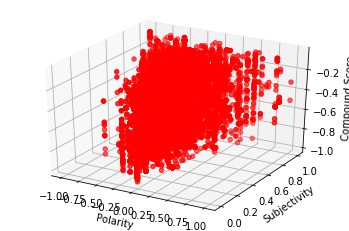

In [4]:
# Visualizing data as a 3D scatter plot (3 features)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

np.linspace(start = 0, stop = 100, num = 5)
ax.scatter(xdata, ydata, zdata, c='r', marker='o')

ax.set_xlabel('Polarity')
ax.set_ylabel('Subjectivity')
ax.set_zlabel('Compound Score')

plt.show()

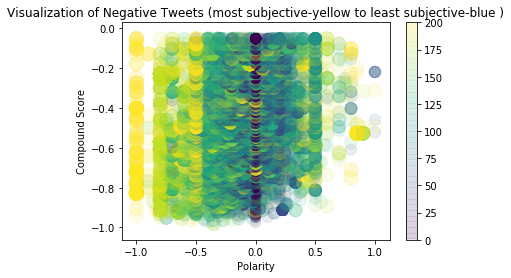

In [4]:
# Visualizing entire data

rng = np.random.RandomState(0)

colors = rng.rand(100)
sizes = 100 * (np.absolute(ydata)+1)
plt.xlabel("Polarity") 
plt.ylabel("Compound Score") 
plt.title("Visualization of Negative Tweets (most subjective-yellow to least subjective-blue )")
plt.scatter(xdata, zdata, c= 200 * ydata, s=sizes, alpha=0.1, cmap='viridis')
plt.colorbar()

# We notice the least subjective scores are mostly centered around polarity score -0,5 to 0.5, but are hardly showing any correlation with the respective compound scores

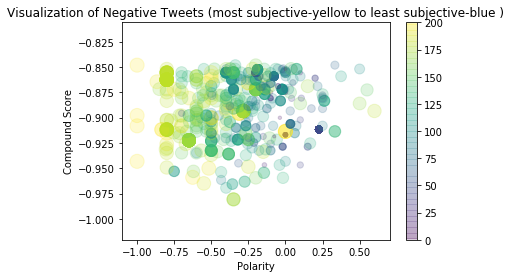

In [9]:
# visualization of the 1000 tweets with highest compound scores

top1000_polarities = xdata[:1000]
top1000_subscore = ydata[:1000]
top1000_compscore = zdata[:1000]
plt.xlabel("Polarity") 
plt.ylabel("Compound Score") 
plt.title("Visualization of Negative Tweets (most subjective-yellow to least subjective-blue )")
plt.scatter(top1000_polarities, top1000_compscore, c= 200 * top1000_subscore, s=200 * top1000_subscore, alpha=0.2, cmap='viridis')
plt.colorbar()

In [5]:
# importing libraries for k-means clustering 

from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot


In [10]:
# clustering first 1000 data points into 3 classes

X = []
X = [[i,j,k] for i, j, k in zip(top1000_polarities,top1000_compscore,top1000_subscore)]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

array([0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1,
       1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [6]:
# k-means on entire data (23040 points) with features including polarity,subjectivity and conpound scores of the tweets

X = [[i,j,k] for i, j, k in zip(xdata, ydata, zdata)]
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
arr = kmeans.labels_
kmeans.labels_


array([1, 1, 1, ..., 0, 2, 0])

In [7]:
l = len(arr)

In [21]:
# storing clustered (5 classes) data to csv

from csv import writer
from csv import reader
import codecs
# newline=''

# Open the input_file in read mode and output_file in write mode
#file = open(filename, encoding="utf8")
with codecs.open('Tweets_sorted_on_negative_compundscores.csv', 'r', 'utf-8') as read_obj, \
        codecs.open('Clustered tweets 0-4.csv', 'w','utf-8' ) as write_obj:
    # Create a csv.reader object from the input file object
    csv_reader = reader(read_obj)
    # Create a csv.writer object from the output file object
    csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
    c = 0
    for row in csv_reader:
        # Append the default text in the row / list
        if(c==0):
            row.append('Cluster Label')
        else:
            row.append(arr[c-1]) 
       
        c = c+1
        # Add the updated row / list to the output file
        csv_writer.writerow(row)

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


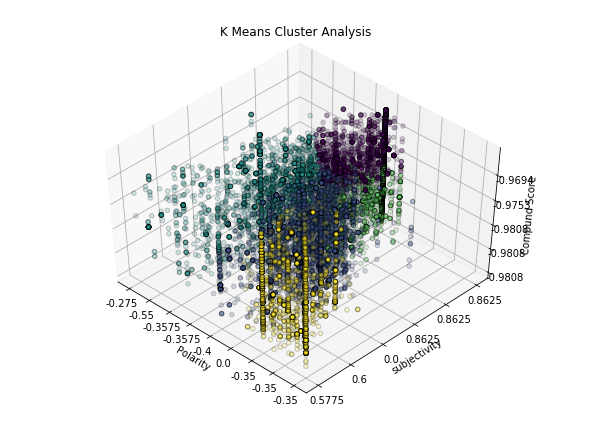

In [8]:
# visualizing entire clustered data (5 clusters)

from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets

fignum = 1

fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, 2, 2], elev=50, azim=134)

ax.scatter(xdata, ydata, zdata,
           c=arr*80, alpha = 0.2, edgecolor='k')

ax.w_xaxis.set_ticklabels(xdata)
ax.w_yaxis.set_ticklabels(ydata)
ax.w_zaxis.set_ticklabels(zdata)
ax.set_xlabel('Polarity')
ax.set_ylabel('subjectivity')
ax.set_zlabel('Compund Score')
ax.set_title("K Means Cluster Analysis")
ax.dist = 12

fig.show()

In [ ]:
# k-means on entire data (23040 points) with features including polarity,subjectivity and conpound scores of the tweets

X = [[i,j,k] for i, j, k in zip(xdata, ydata, zdata)]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
arr = []
arr = kmeans.labels_
kmeans.labels_

In [18]:
# storing clustered (3 clusters) data to csv

from csv import writer
from csv import reader
import codecs

with codecs.open('Tweets_sorted_on_negative_compundscores.csv', 'r', 'utf-8') as read_obj, \
        codecs.open('Clustered tweets 0-2.csv', 'w','utf-8' ) as write_obj:
    # Create a csv.reader object from the input file object
    csv_reader = reader(read_obj)
    # Create a csv.writer object from the output file object
    csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
    c = 0
    for row in csv_reader:
        # Append the default text in the row / list
        if(c==0):
            row.append('Cluster Label')
        else:
            row.append(arr[c-1]) 
       
        c = c+1
        # Add the updated row / list to the output file
        csv_writer.writerow(row)

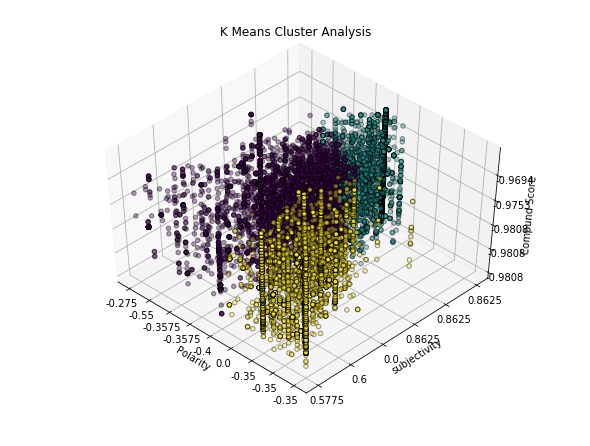

In [19]:
# visualizing entire clustered data (3 clusters)

from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets

fignum = 1

fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, 2, 2], elev=50, azim=134)


ax.scatter(xdata, ydata, zdata,
           c=arr*80, alpha = 0.4, edgecolor='k')

ax.w_xaxis.set_ticklabels(xdata)
ax.w_yaxis.set_ticklabels(ydata)
ax.w_zaxis.set_ticklabels(zdata)
ax.set_xlabel('Polarity')
ax.set_ylabel('subjectivity')
ax.set_zlabel('Compund Score')
ax.set_title("K Means Cluster Analysis")
ax.dist = 12

fig.show()